# Introduction


The dataset comprises information on bestselling books from Amazon, covering a variety of genres, authors, and publication years. It includes key attributes such as book names, authors, user ratings, review counts, prices, and genres, along with sentiment analysis metrics derived from book descriptions. With this dataset, we aim to conduct exploratory data analysis (EDA) to gain insights into the factors influencing book popularity and pricing on Amazon. Our analysis will delve into the distribution of user ratings, review counts, and prices, exploring trends over different genres and publication years. Additionally, we will investigate correlations between user ratings, review counts, and prices, along with exploring the impact of sentiment analysis on book success. This study will provide valuable insights for authors, publishers, and book enthusiasts, aiding in understanding the dynamics of the bestselling book market on Amazon.

<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h3>


In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as ex
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid') 
#import ydata_profiling as pp
import re
import string
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
def rmse(y,y_hat):
    return np.sqrt(mean_squared_error(y,y_hat))

plt.rc('figure',figsize=(20,11))
plt.rc('font',size=12)

<a id="1.2"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Data Importation And Missing Value Assessment</h3>


In [43]:
a_data =pd.read_csv('bestsellers with categories.csv')
a_data.head(3)


Name              Author  User Rating  \
0            10-Day Green Smoothie Cleanse            JJ Smith          4.7   
1                        11/22/63: A Novel        Stephen King          4.6   
2  12 Rules for Life: An Antidote to Chaos  Jordan B. Peterson          4.7   

   Reviews  Price  Year        Genre  
0    17350      8  2016  Non Fiction  
1     2052     22  2011      Fiction  
2    18979     15  2018  Non Fiction

In [44]:
a_data

Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3               George Orwell          4.7    21424      6  2017      Fiction  
4    National Geographic Kids          4.8     7665     12  2019  Non Fiction  
..                        ...          ...      ...    ...   ...          ...  
545               Jeff Kinney          4.9     9413      8  2019      Fiction  
546               Jen Sincero          4.7    14331      8  2016  Non Fiction  
547               Jen Sincero          4.7    14331      8  2017  Non Fiction  
548               Jen Sincero          4.7    14331      8  2018  Non Fiction  
549               Jen Sincero          4.7    14331      8  2019  Non Fiction  

[550 rows x 7 columns]

In [45]:
a_data['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: Name, Length: 351, dtype: int64

In [46]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [47]:
nltk.download('vader_lexicon')
a_data['Name'] = a_data['Name'].apply(lambda x: x.lower())
a_data['Name'] = a_data['Name'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
sid = SentimentIntensityAnalyzer()
a_data['Sentiment'] = a_data.Name.apply(lambda x: sid.polarity_scores(x))
a_data['Positive Sentiment'] = a_data.Sentiment.apply(lambda x: x['pos'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Priyanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<a id="2"></a>
<h1 style="background-color:orange;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>


In [48]:
numeric_data = a_data.select_dtypes(include='number')

info = numeric_data.iloc[:,:-2].describe()
info.loc['median'] = numeric_data.median()
info.loc['skew'] = numeric_data.skew()
info.loc['kurtosis'] = numeric_data.kurt()

info

User Rating       Reviews       Price
count      550.000000    550.000000  550.000000
mean         4.618364  11953.281818   13.100000
std          0.226980  11731.132017   10.842262
min          3.300000     37.000000    0.000000
25%          4.500000   4058.000000    7.000000
50%          4.700000   8580.000000   11.000000
75%          4.800000  17253.250000   16.000000
max          4.900000  87841.000000  105.000000
median       4.700000   8580.000000   11.000000
skew        -1.502125      2.421597    3.685057
kurtosis     3.465375      8.809313   22.433520

In [49]:
#pp.ProfileReport(a_data)

<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Numeric Variables Distributions</h3>


C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



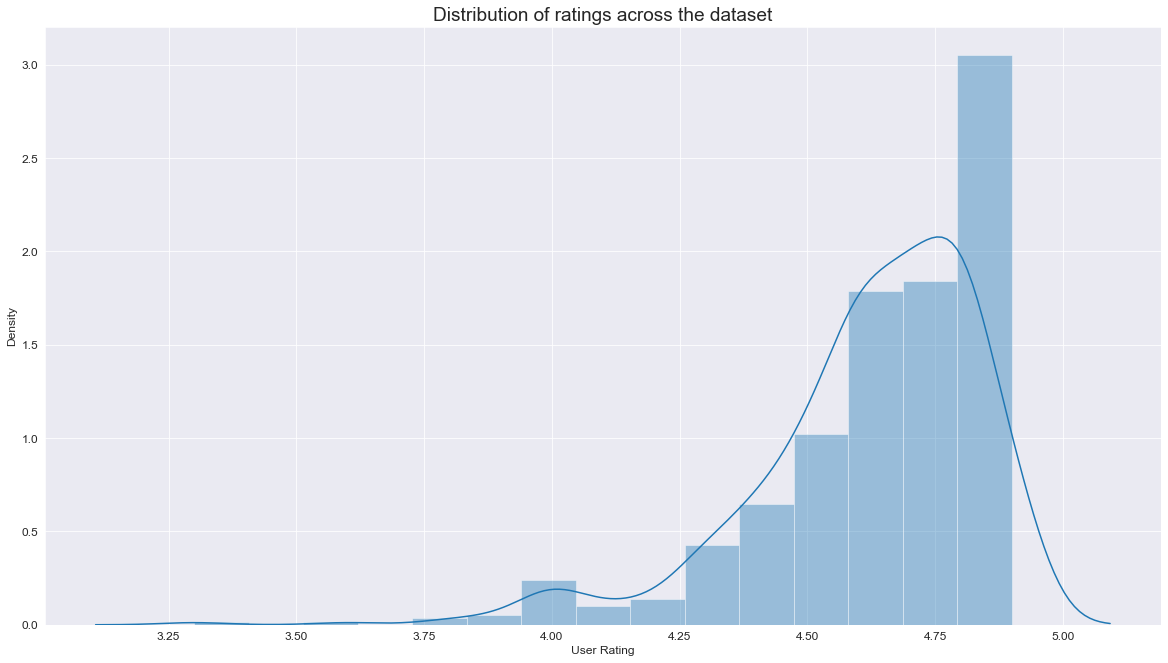

In [50]:
ax =sns.distplot(a_data['User Rating'],bins=15)
ax.set_title('Distribution of ratings across the dataset',fontsize=19)
plt.show()

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



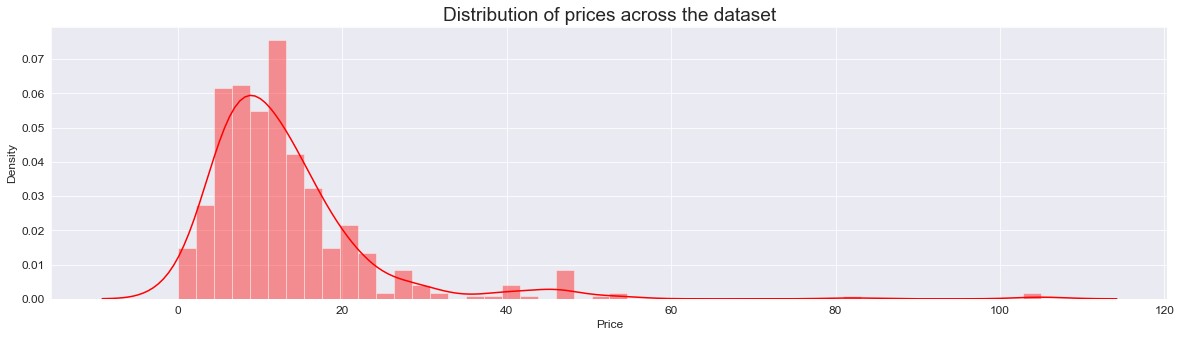

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



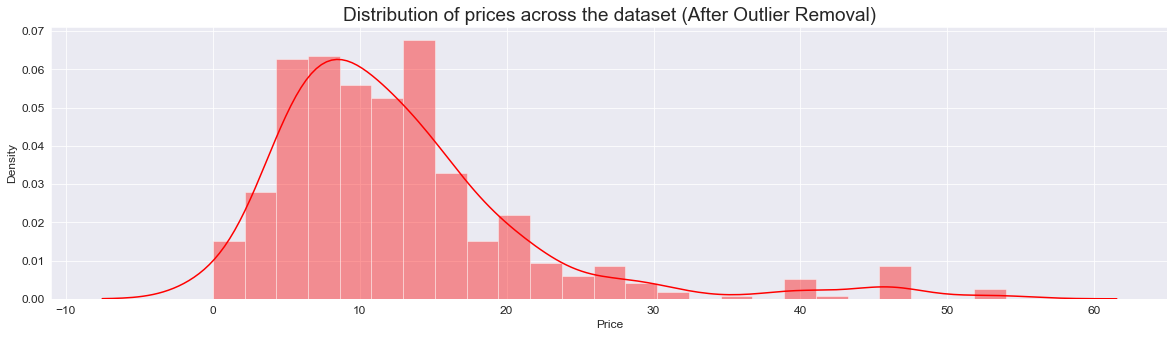

In [51]:
plt.subplot(2,1,1)
ax =sns.distplot(a_data['Price'],color='red')
ax.set_title('Distribution of prices across the dataset',fontsize=19)
plt.show()
plt.subplot(2,1,2)
a_data = a_data.query('Price < 60')
ax =sns.distplot(a_data['Price'],color='red')
ax.set_title('Distribution of prices across the dataset (After Outlier Removal)',fontsize=19)
plt.show()

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



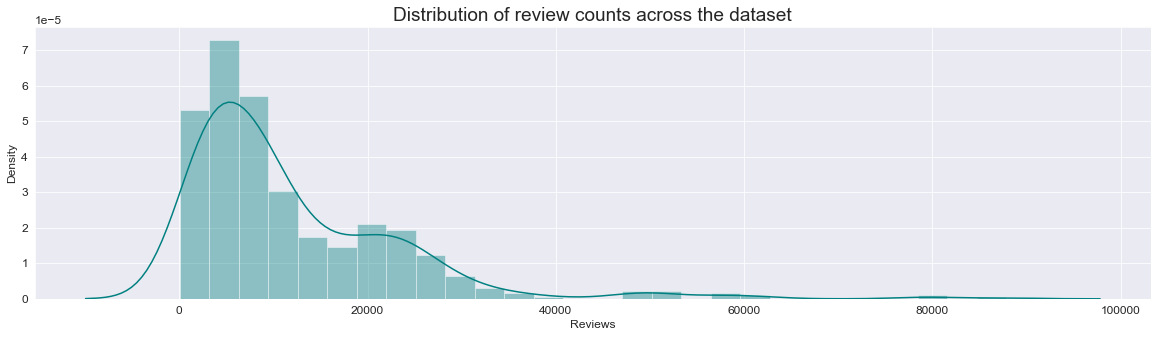

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_16840\2973398749.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



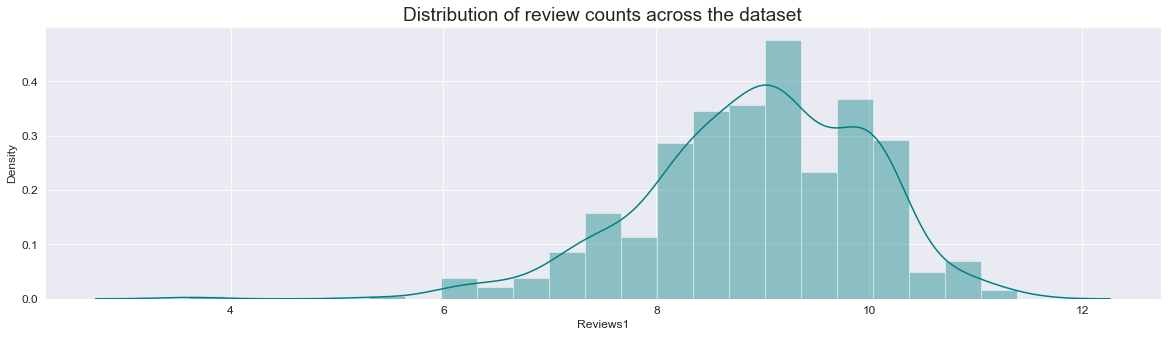

In [53]:
plt.subplot(2,1,1)
ax =sns.distplot(a_data['Reviews'],color='teal')
ax.set_title('Distribution of review counts across the dataset',fontsize=19)
plt.show()
plt.subplot(2,1,2)
a_data['Reviews1'] =np.log(a_data['Reviews'])
ax =sns.distplot((a_data['Reviews1']),color='teal')
ax.set_title('Distribution of review counts across the dataset',fontsize=19)
plt.show()

In [54]:
fig = ex.pie(a_data,names='Genre',title='Proportion Of Different Genres in Our Dataset',hover_data=['Genre'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Year Based Analysis</h3>


<AxesSubplot:title={'center':'Prices Of Each Genre Over The Years'}, xlabel='Year', ylabel='Genre'>

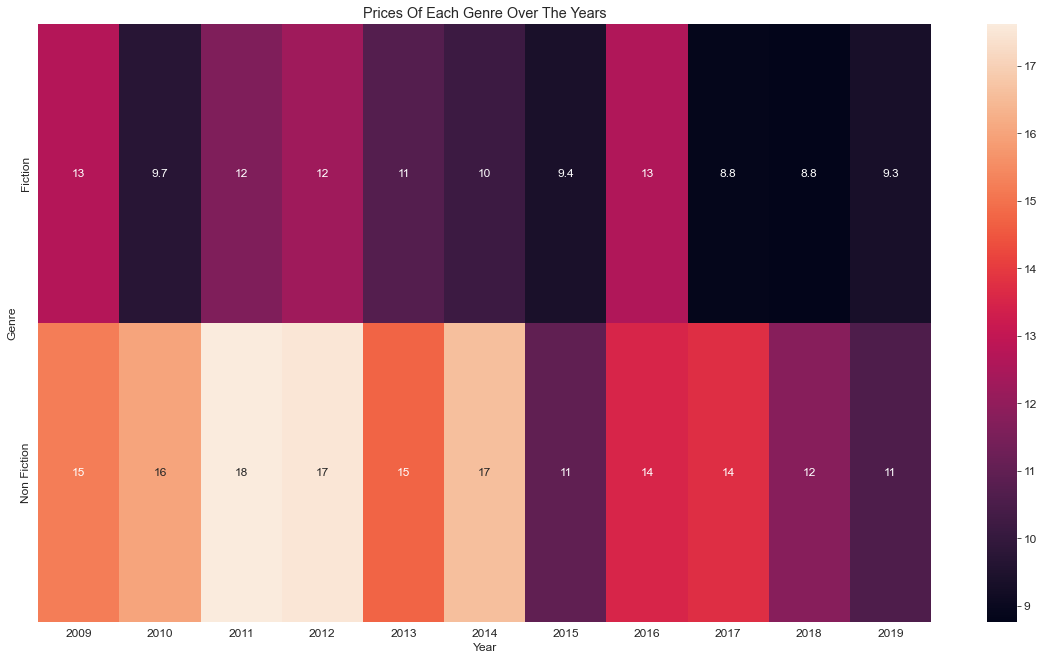

In [55]:
pivot = a_data.pivot_table(values='Price',columns='Year',index='Genre')
plt.title('Prices Of Each Genre Over The Years')
sns.heatmap(pivot,annot=True)

### We can see that both genres even though they are in different price ranges they are similarly experiencing a decrease in their price over the years.

In [56]:
a_data_copy = a_data.copy()

# Convert 'Price' column to numeric, replacing non-numeric values with NaN
a_data_copy['Price'] = pd.to_numeric(a_data_copy['Price'], errors='coerce')

# Drop rows with NaN values in the 'Price' column
a_data_copy = a_data_copy.dropna(subset=['Price'])

# Convert 'Price' column to numeric again to ensure it's completely numeric
a_data_copy['Price'] = pd.to_numeric(a_data_copy['Price'])

# Group by 'Year' and calculate mean and median
gby_year = a_data_copy.groupby('Year')['Price'].mean()
gby_year_median = a_data_copy.groupby('Year')['Price'].median()

# Plot the data
tr1 = go.Scatter(x=gby_year.index, y=gby_year, name='Mean')
tr2 = go.Scatter(x=gby_year_median.index, y=gby_year_median, name='Median')

layout = dict(title='Average Book Price Over The Years', yaxis_title='Mean Price', xaxis_title='Year')
fig = go.Figure(data=[tr1, tr2], layout=layout)

fig.show()

### There is a clear trend, we can see that the average book price is decreasing with each year

In [57]:
a_data_copy['Reviews'] = pd.to_numeric(a_data_copy['Reviews'], errors='coerce')

# Drop rows with NaN values in the 'Reviews' column
a_data_copy = a_data_copy.dropna(subset=['Reviews'])

# Convert 'Reviews' column to numeric again to ensure it's completely numeric
a_data_copy['Reviews'] = pd.to_numeric(a_data_copy['Reviews'])

# Group by 'Year' and calculate mean and median
gby_year_reviews_mean = a_data_copy.groupby('Year')['Reviews'].mean()
gby_year_reviews_median = a_data_copy.groupby('Year')['Reviews'].median()

# Plot the data
tr1 = go.Scatter(x=gby_year_reviews_mean.index, y=gby_year_reviews_mean, name='Mean')
tr2 = go.Scatter(x=gby_year_reviews_median.index, y=gby_year_reviews_median, name='Median')

layout = dict(title='Average Book Review Count Over The Years', yaxis_title='Mean Number Of Reviews', xaxis_title='Year')
fig = go.Figure(data=[tr1, tr2], layout=layout)

fig.show()

### There is a clear trend, we can see that the average review count increases with each year

In [58]:

a_data_copy['User Rating'] = pd.to_numeric(a_data_copy['User Rating'], errors='coerce')

# Drop rows with NaN values in the 'User Rating' column
a_data_copy = a_data_copy.dropna(subset=['User Rating'])

# Group by 'Year' and calculate mean and median
gby_year_user_rating_mean = a_data_copy.groupby('Year')['User Rating'].mean()
gby_year_user_rating_median = a_data_copy.groupby('Year')['User Rating'].median()

# Plot the data
tr1 = go.Scatter(x=gby_year_user_rating_mean.index, y=gby_year_user_rating_mean, name='Mean')
tr2 = go.Scatter(x=gby_year_user_rating_median.index, y=gby_year_user_rating_median, name='Median')

layout = dict(title='Average Book User Rating Over The Years', yaxis_title='Mean Rating', xaxis_title='Year')
fig = go.Figure(data=[tr1, tr2], layout=layout)

fig.show()

### There is a clear trend, we can see that the average rating score increase with each year

In [59]:
print('There are -{}- unique number of authors in our dataset!'.format(len(a_data['Author'].unique())))

There are -247- unique number of authors in our dataset!


<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Text Based Analysis</h3>


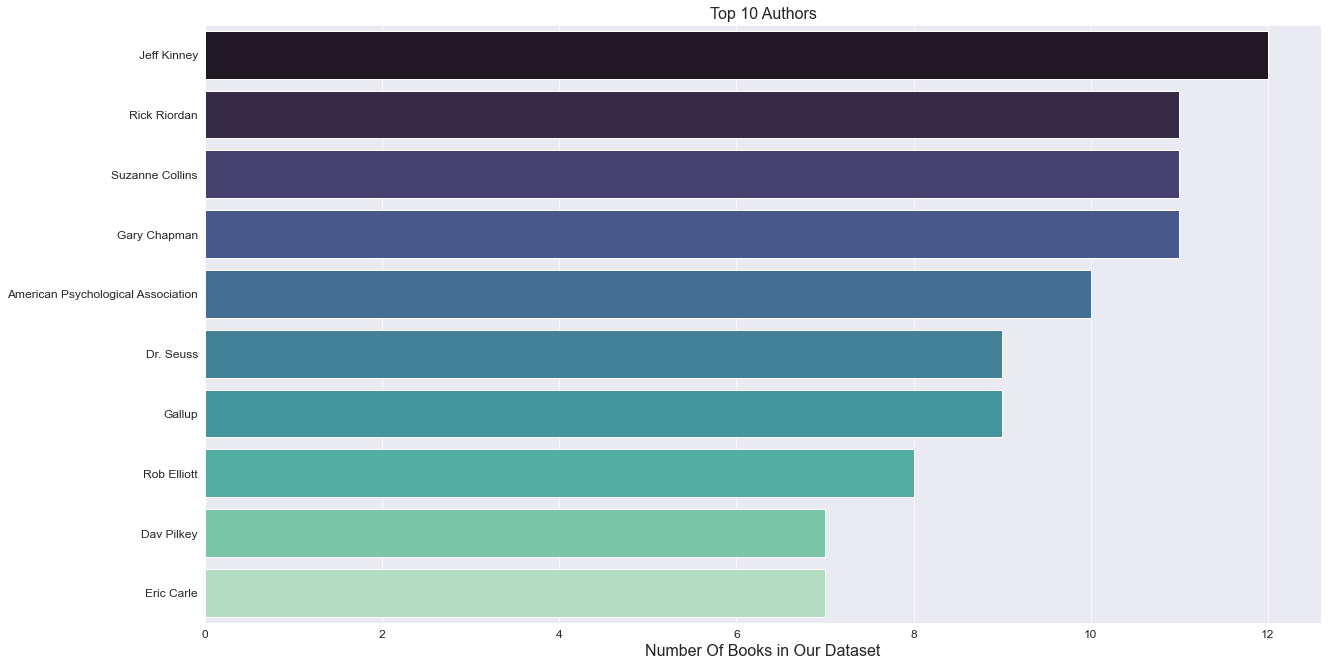

In [60]:
ax = sns.barplot(y=a_data['Author'].value_counts()[:10].index,x=a_data['Author'].value_counts()[:10].values,palette='mako')
ax.set_title('Top 10 Authors',fontsize=16)
ax.set_xlabel('Number Of Books in Our Dataset',fontsize=16)
plt.show()

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_16840\3362140694.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



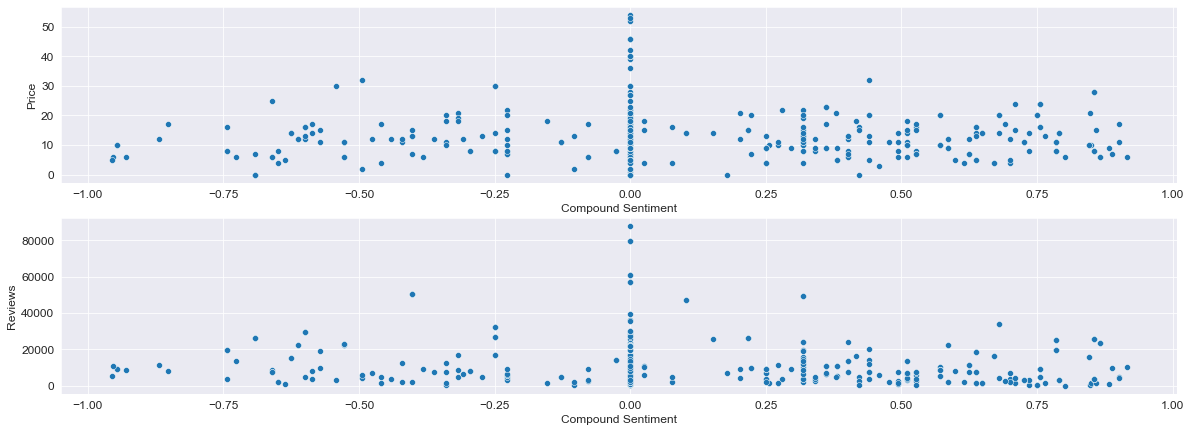

In [61]:
a_data['Compound Sentiment'] = a_data['Sentiment'].apply(lambda x: x['compound'])

# Create scatter plots
plt.subplot(3, 1, 1)
sns.scatterplot(x=a_data['Compound Sentiment'], y=a_data['Price'])
plt.subplot(3, 1, 2)
sns.scatterplot(x=a_data['Compound Sentiment'], y=a_data['Reviews'])
plt.show()

### We can clearly see that there is no significant correaltion between the sentiment compounds and our numeric features (price, review counts, and rating)

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



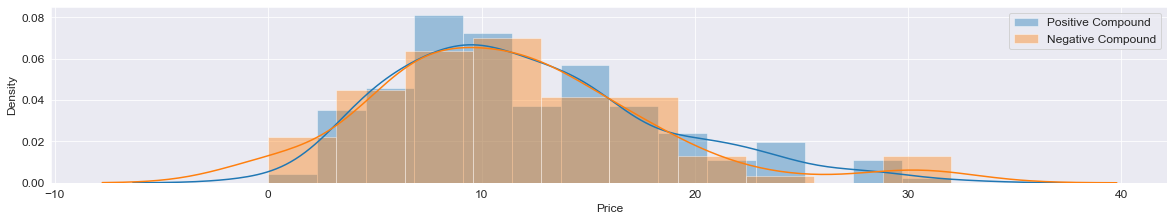

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



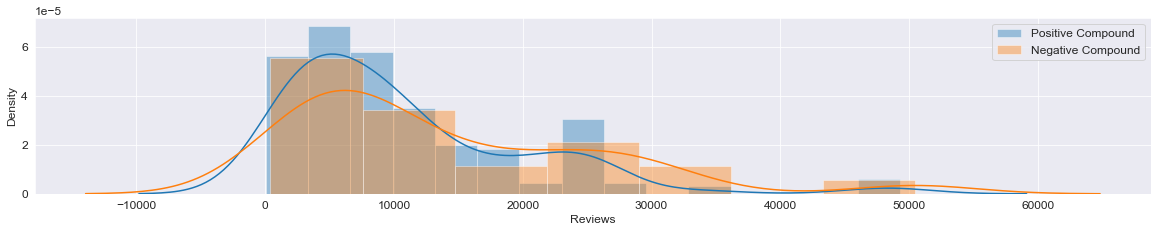

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



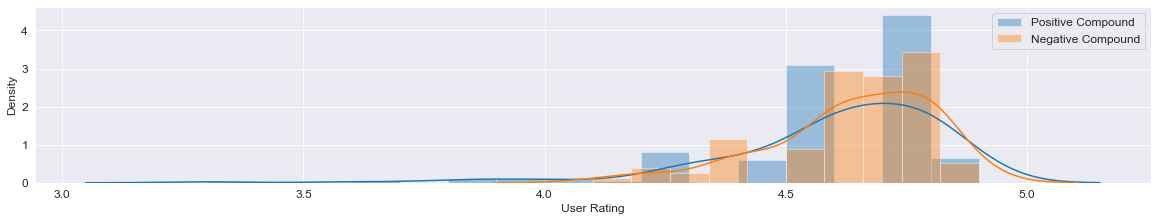

In [62]:
plt.subplot(3,1,1)
ax =sns.distplot((a_data[a_data['Compound Sentiment']>0]['Price']),label='Positive Compound')
ax =sns.distplot((a_data[a_data['Compound Sentiment']<0]['Price']),label='Negative Compound')
plt.legend()
plt.show()
plt.subplot(3,1,2)
ax =sns.distplot((a_data[a_data['Compound Sentiment']>0]['Reviews']),label='Positive Compound')
ax =sns.distplot((a_data[a_data['Compound Sentiment']<0]['Reviews']),label='Negative Compound')
plt.legend()
plt.show()
plt.subplot(3,1,3)
ax =sns.distplot((a_data[a_data['Compound Sentiment']>0]['User Rating']),label='Positive Compound')
ax =sns.distplot((a_data[a_data['Compound Sentiment']<0]['User Rating']),label='Negative Compound')
plt.legend()
plt.show()

### We can clearly see that there is no significant change between the sentiment compounds and our numeric features (price, review counts, and rating) distribution

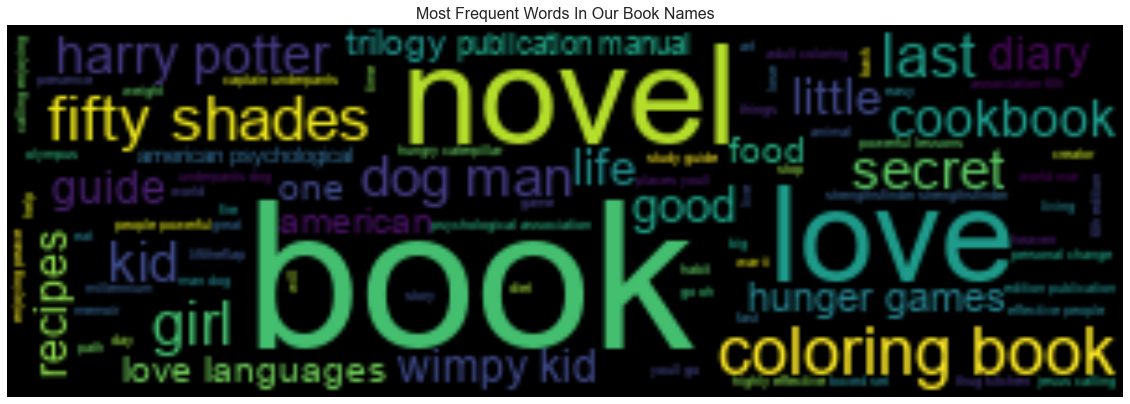

In [63]:
wordcloud = WordCloud(width=300, height=100, stopwords=STOPWORDS, font_path='arial').generate(' '.join(a_data['Name'].values))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words In Our Book Names', fontsize=16)
plt.show()


<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Using The Book Name Feature as A Predictor For Price</h3>


In [64]:
NUMBER_OF_COMPONENTS = 180

vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(a_data['Name'])

svd_truncer = TruncatedSVD(n_components=NUMBER_OF_COMPONENTS)
dec_mat = svd_truncer.fit_transform(sp_matrix)

In [65]:
cu_sum = np.cumsum(svd_truncer.explained_variance_ratio_)
tr1 = go.Scatter(x=np.arange(0,len(cu_sum)),y=cu_sum)
layout=dict(yaxis_title='Explained Variance',xaxis_title='# Of Components',title='Explained Variance Of Name Tfidf Matrix Using {} Components'.format(NUMBER_OF_COMPONENTS))
go.Figure(data=[tr1],layout=layout)

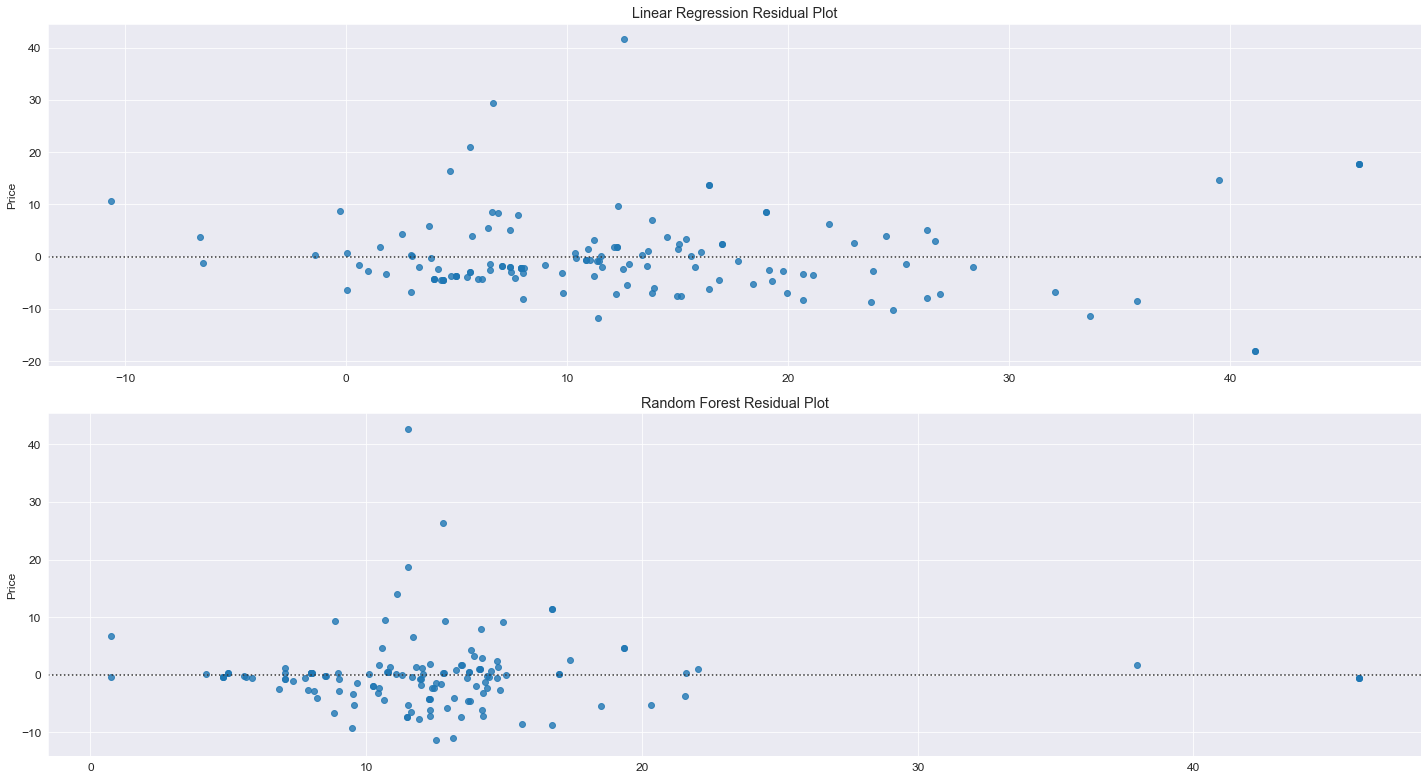

In [66]:
train_x,test_x,train_y,test_y = train_test_split(dec_mat,a_data['Price'],random_state=42)


LR_Pipe = Pipeline(steps = [('model',LinearRegression())])
LR_Pipe.fit(train_x,train_y)    
RF_Pipe = Pipeline(steps = [('model',RandomForestRegressor(random_state=42))])
RF_Pipe.fit(train_x,train_y)    


lr_predictions = LR_Pipe.predict(test_x)
rf_predictions = RF_Pipe.predict(test_x)

lr_residuals = test_y - lr_predictions

# Create a residual plot for the linear regression model
plt.subplot(2, 1, 1)
plt.title('Linear Regression Residual Plot')
sns.residplot(x=lr_predictions, y=lr_residuals)

# Assuming you have also trained a random forest model and made predictions
# Calculate the residuals of the random forest model
rf_residuals = test_y - rf_predictions

# Create a residual plot for the random forest model
plt.subplot(2, 1, 2)
plt.title('Random Forest Residual Plot')
sns.residplot(x=rf_predictions, y=rf_residuals)

plt.tight_layout()
plt.show()

In [67]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(LR_Pipe, file)

### We will use the linear regression model for our meta feature, we see that in comparison to the random forest model it looks like the linear regression tends to show less heteroskedasticity.


In [68]:
L_Encoder = LabelEncoder()
LR_Pipe.fit(dec_mat,a_data['Price'])
a_data['LR_Pred']  = RF_Pipe.predict(dec_mat)
a_data['Genre'] = L_Encoder.fit_transform(a_data['Genre'] )


C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_16840\3314603164.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_16840\3314603164.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<a id="1.1"></a>
<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Price Prediction Using Stacking And Random Forest Model</h3>


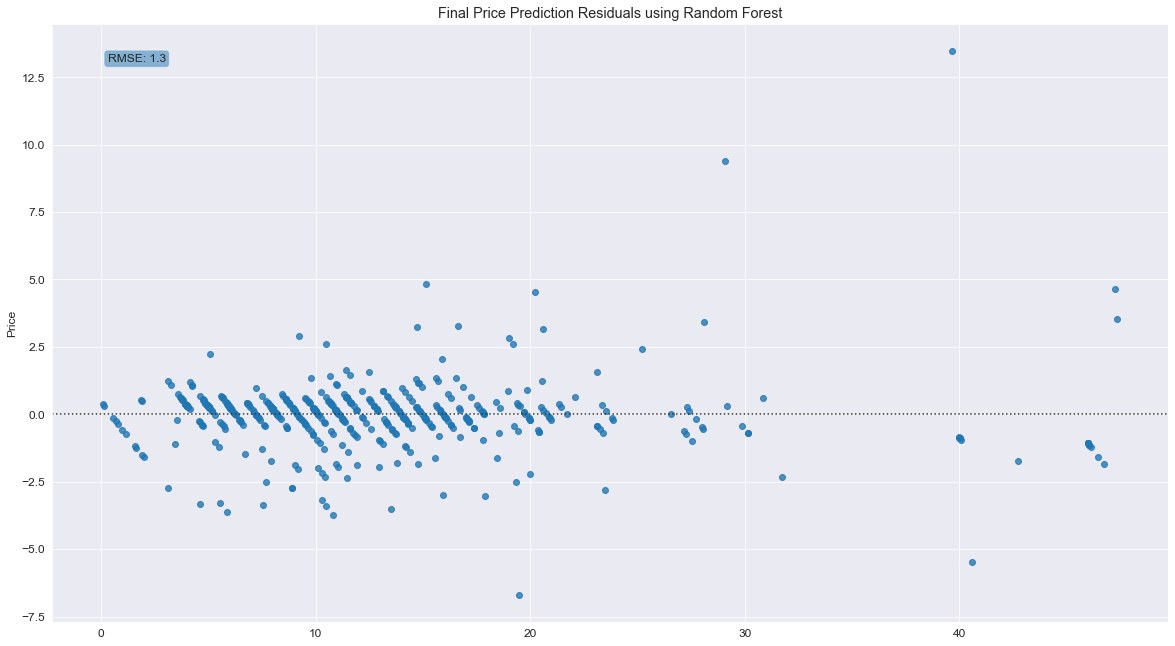

In [69]:
X = a_data[['Year','Genre','Compound Sentiment','LR_Pred']]
Y = a_data['Price']
RF_Pipe.fit(X,Y)

plt.title('Final Price Prediction Residuals sing Random Forest')
RF_Predictions = RF_Pipe.predict(X)
RF_Residuals = Y - RF_Predictions

plt.title('Final Price Prediction Residuals using Random Forest')
ax = sns.residplot(x=RF_Predictions, y=RF_Residuals)
textstr = f'RMSE: {np.round(rmse(RF_Predictions, Y), 2)}'
props = dict(boxstyle='round', facecolor='tab:blue', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.show()

In [70]:
output = pd.DataFrame({"Actual":Y,'Prediction':RF_Pipe.predict(X)})

fig = make_subplots(
    rows=3, cols=2,subplot_titles=('','Actual','Predictions','Residuals'),
    vertical_spacing=0.09,
    specs=[[{"type": "table","rowspan": 3}     ,{"type": "scatter"}],
           [None                               ,{"type": "scatter"}],           
           [None                               ,{"type": "scatter"}]                           
          ]
)

fig.add_trace(
    go.Scatter(
        x=np.arange(0,len(output["Actual"])),
        y=output["Actual"],
        mode="markers",
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=np.arange(0,len(output["Prediction"])),
        y=output["Prediction"],
        mode="markers",
    ),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(
        x=np.arange(0,len(output["Prediction"])),
        y=output["Prediction"]-output["Actual"],
        mode="markers",
    ),
    row=3, col=2
)

fig.add_trace(
    go.Table(
        header=dict(
            values=['Prediction','Actual'],
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[output[k].tolist() for k in output.columns],
            align = "left")
    ),
    row=1, col=1
)



fig.add_shape(type="line",
    x0=0, y0=(output["Prediction"]-output["Actual"]).mean(), x1=len(output["Prediction"]), y1=(output["Prediction"]-output["Actual"]).mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x3', 
        yref='y3'
)

fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Prediction Evaluation",
)

fig.show()

In [71]:
output = pd.DataFrame({'Book Name':a_data['Name'],'Year':a_data["Year"],'Actual Price':a_data['Price'],'Predicted Price':RF_Pipe.predict(X)})
output.to_csv('Price_Prediction.csv',index=False)

In [72]:
output

Book Name  Year  Actual Price  \
0                         10day green smoothie cleanse  2016             8   
1                                       112263 a novel  2011            22   
2               12 rules for life an antidote to chaos  2018            15   
3                                 1984 signet classics  2017             6   
4    5000 awesome facts about everything national g...  2019            12   
..                                                 ...   ...           ...   
545         wrecking ball diary of a wimpy kid book 14  2019             8   
546  you are a badass how to stop doubting your gre...  2016             8   
547  you are a badass how to stop doubting your gre...  2017             8   
548  you are a badass how to stop doubting your gre...  2018             8   
549  you are a badass how to stop doubting your gre...  2019             8   

     Predicted Price  
0              10.43  
1              21.36  
2              14.16  
3               6.43  
4              10.96  
..               ...  
545             8.18  
546             7.92  
547             8.00  
548             7.94  
549             7.95  

[547 rows x 4 columns]

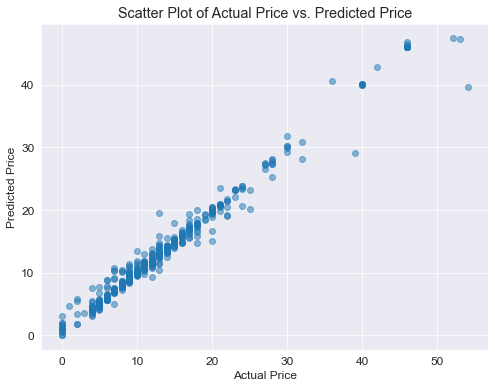

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(output['Actual Price'], output['Predicted Price'], alpha=0.5)  
plt.title('Scatter Plot of Actual Price vs. Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)  
plt.show()

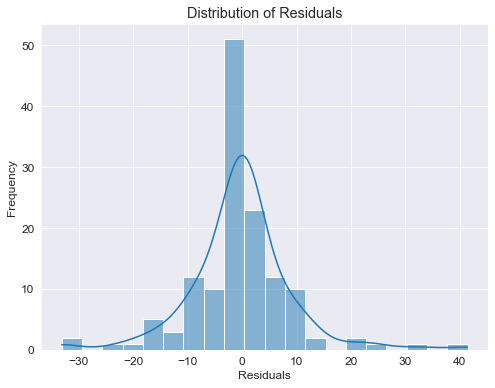

In [74]:

plt.figure(figsize=(8, 6))
sns.histplot(lr_residuals, kde=True, bins=20)  
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [75]:
a_data


Name  \
0                         10day green smoothie cleanse   
1                                       112263 a novel   
2               12 rules for life an antidote to chaos   
3                                 1984 signet classics   
4    5000 awesome facts about everything national g...   
..                                                 ...   
545         wrecking ball diary of a wimpy kid book 14   
546  you are a badass how to stop doubting your gre...   
547  you are a badass how to stop doubting your gre...   
548  you are a badass how to stop doubting your gre...   
549  you are a badass how to stop doubting your gre...   

                       Author  User Rating  Reviews  Price  Year  Genre  \
0                    JJ Smith          4.7    17350      8  2016      1   
1                Stephen King          4.6     2052     22  2011      0   
2          Jordan B. Peterson          4.7    18979     15  2018      1   
3               George Orwell          4.7    21424      6  2017      0   
4    National Geographic Kids          4.8     7665     12  2019      1   
..                        ...          ...      ...    ...   ...    ...   
545               Jeff Kinney          4.9     9413      8  2019      0   
546               Jen Sincero          4.7    14331      8  2016      1   
547               Jen Sincero          4.7    14331      8  2017      1   
548               Jen Sincero          4.7    14331      8  2018      1   
549               Jen Sincero          4.7    14331      8  2019      1   

                                             Sentiment  Positive Sentiment  \
0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...               0.000   
1    {'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...               0.697   
2    {'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'comp...               0.000   
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...               0.000   
4    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...               0.369   
..                                                 ...                 ...   
545  {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...               0.000   
546  {'neg': 0.291, 'neu': 0.516, 'pos': 0.192, 'co...               0.192   
547  {'neg': 0.291, 'neu': 0.516, 'pos': 0.192, 'co...               0.192   
548  {'neg': 0.291, 'neu': 0.516, 'pos': 0.192, 'co...               0.192   
549  {'neg': 0.291, 'neu': 0.516, 'pos': 0.192, 'co...               0.192   

     Reviews1  Compound Sentiment    LR_Pred  
0    9.761348              0.0000  14.205714  
1    7.626570              0.3182  18.986000  
2    9.851088             -0.5719  14.082500  
3    9.972267              0.0000   9.810000  
4    8.944420              0.6249  11.690000  
..        ...                 ...        ...  
545  9.149847             -0.2263   9.000000  
546  9.570180             -0.0258   8.030000  
547  9.570180             -0.0258   8.030000  
548  9.570180             -0.0258   8.030000  
549  9.570180             -0.0258   8.030000  

[547 rows x 12 columns]

In [76]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 549
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                547 non-null    object 
 1   Author              547 non-null    object 
 2   User Rating         547 non-null    float64
 3   Reviews             547 non-null    int64  
 4   Price               547 non-null    int64  
 5   Year                547 non-null    int64  
 6   Genre               547 non-null    int32  
 7   Sentiment           547 non-null    object 
 8   Positive Sentiment  547 non-null    float64
 9   Reviews1            547 non-null    float64
 10  Compound Sentiment  547 non-null    float64
 11  LR_Pred             547 non-null    float64
dtypes: float64(5), int32(1), int64(3), object(3)
memory usage: 53.4+ KB


In [81]:
y = a_data['Price']
x = a_data.drop(['Price','Name','Author','Sentiment','LR_Pred','Reviews1'],axis = 1)
x.describe()


User Rating       Reviews         Year       Genre  Positive Sentiment  \
count   547.000000    547.000000   547.000000  547.000000          547.000000   
mean      4.618647  11987.469835  2014.010969    0.563071            0.154817   
std       0.227463  11753.757682     3.166310    0.496460            0.217626   
min       3.300000     37.000000  2009.000000    0.000000            0.000000   
25%       4.500000   4088.000000  2011.000000    0.000000            0.000000   
50%       4.700000   8580.000000  2014.000000    1.000000            0.000000   
75%       4.800000  17323.000000  2017.000000    1.000000            0.320000   
max       4.900000  87841.000000  2019.000000    1.000000            0.730000   

       Compound Sentiment  
count          547.000000  
mean             0.115182  
std              0.393448  
min             -0.955200  
25%              0.000000  
50%              0.000000  
75%              0.381800  
max              0.915300

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable

# Step 2: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Step 3: Create an instance of RandomForestRegressor
rf1_model = RandomForestRegressor(random_state=42)

# Step 4: Fit the model to your training data
rf1_model.fit(x_train, y_train)

# Step 5: Evaluate the model's performance
predictions = rf1_model.predict(x_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 4.927043939393941
Mean Squared Error (MSE): 56.60274028813132
Root Mean Squared Error (RMSE): 7.523479267475343
R-squared (R2): 0.3849959075766055


C:\Users\Priyanshu\.ipython\anaconda3.0\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [79]:
x_train

User Rating  Reviews  Year  Genre  Positive Sentiment  Compound Sentiment
95           4.7     5505  2009      0               0.000              0.0000
338          4.7    35799  2014      0               0.000              0.0000
307          4.0     5069  2012      1               0.000              0.0000
291          4.8     7802  2019      1               0.244              0.4404
240          4.8     7866  2019      1               0.000              0.0000
..           ...      ...   ...    ...                 ...                 ...
73           4.8     6540  2014      0               0.000             -0.2263
108          4.5    13964  2012      0               0.262              0.4404
272          4.5     8580  2010      1               0.000              0.0000
437          4.8    49288  2015      0               0.535              0.3182
104          4.4    23631  2012      0               0.000              0.0000

[437 rows x 6 columns]

In [80]:
import pickle
with open('model2.pkl', 'wb') as file:
    pickle.dump(rf1_model, file)

Conclusion


Our analysis of the Amazon bestselling books dataset reveals diverse trends in user ratings, reviews, and prices across different genres and publication years. Correlations between these factors suggest mutual influences, highlighting the intricate dynamics of book popularity and pricing. Additionally, sentiment analysis underscores the significance of positive sentiment in book descriptions, potentially impacting user engagement and ratings. These insights are invaluable for authors, publishers, and book enthusiasts in understanding market dynamics and informing decision-making processes. Going forward, further exploration into specific genres or predictive modeling could enhance our understanding of the factors driving book success on Amazon, facilitating more targeted marketing strategies and content creation efforts within the industry.